<a href="https://colab.research.google.com/github/Utkarsha1a/DL_Projects/blob/main/Tomato_Leafdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import load_model

In [7]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import  classification_report

In [28]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [12]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 32.46 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [13]:
file_path='/content/PlantVillage-Dataset/raw/color/'


In [14]:
name_class = os.listdir(file_path)
name_class

['Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Raspberry___healthy',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Soybean___healthy',
 'Apple___Black_rot',
 'Tomato___Target_Spot',
 'Strawberry___Leaf_scorch',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Squash___Powdery_mildew',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Potato___Early_blight',
 'Apple___healthy',
 'Pepper,_bell___healthy',
 'Cherry_(including_sour)___healthy',
 'Strawberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Tomato_mosaic_virus',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Septoria_leaf_spot',
 'Pepper,_bell___Bacterial_spot',
 'Grape___Es

In [15]:
filepaths = list(glob.glob(file_path+'/*Tomato*/*.*'))
filepaths

['/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/41a6e837-7822-447c-b887-3be149d58322___Crnl_L.Mold 7100.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/da83c654-4106-45be-b410-28ae89d93e22___Crnl_L.Mold 7054.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/d51c5c7e-feb1-46b2-b5c9-05b9b742bf16___Crnl_L.Mold 6505.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/86e29af1-d73d-4403-b436-247705413f6d___Crnl_L.Mold 6599.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/88e7f3bd-69e4-48b1-a6c4-10e5bded113a___Crnl_L.Mold 6514.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/8ec82028-24e9-4bb8-8c36-31a42189790e___Crnl_L.Mold 8783.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/113ae06c-f41b-47f3-a1a5-bffd33fcfac1___Crnl_L.Mold 8746.JPG',
 '/content/PlantVillage-Dataset/raw/color/Tomato___Leaf_Mold/8989f67e-ccc0-4d37-a950-59d3a69856fe___Crnl_L.Mold 7175.JPG',
 '/content/Plant

In [16]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/PlantVillage-Dataset/raw/color/Tomato...,Tomato___Late_blight
1,/content/PlantVillage-Dataset/raw/color/Tomato...,Tomato___healthy
2,/content/PlantVillage-Dataset/raw/color/Tomato...,Tomato___Spider_mites Two-spotted_spider_mite
3,/content/PlantVillage-Dataset/raw/color/Tomato...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
4,/content/PlantVillage-Dataset/raw/color/Tomato...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [17]:
data.shape

(18160, 2)

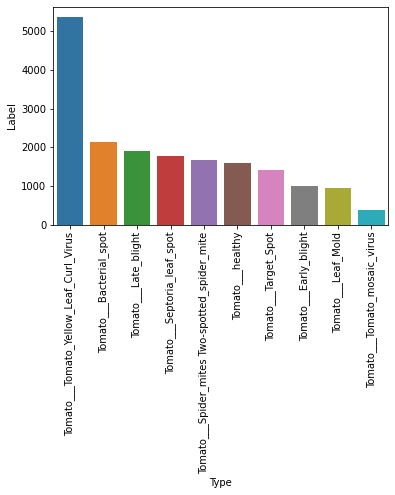

In [18]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [19]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

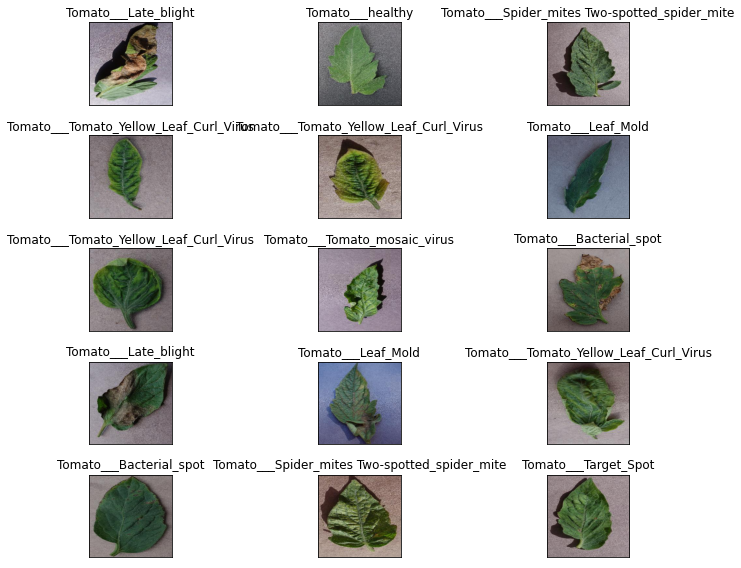

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [29]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [30]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 13620 validated image filenames belonging to 10 classes.
Found 13620 validated image filenames belonging to 10 classes.
Found 4540 validated image filenames belonging to 10 classes.


In [33]:
from keras.applications import resnet
model = resnet.ResNet50

pretrained_model = model(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [41]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [42]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [44]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=my_callbacks
)

Epoch 1/10
426/426 [==============================] - 91s 167ms/step - loss: 0.5052 - accuracy: 0.8299 - val_loss: 0.2399 - val_accuracy: 0.9191
Epoch 2/10
426/426 [==============================] - 68s 161ms/step - loss: 0.2387 - accuracy: 0.9156 - val_loss: 0.1664 - val_accuracy: 0.9448
Epoch 3/10
426/426 [==============================] - 68s 160ms/step - loss: 0.1706 - accuracy: 0.9397 - val_loss: 0.1100 - val_accuracy: 0.9617
Epoch 4/10
426/426 [==============================] - 68s 160ms/step - loss: 0.1127 - accuracy: 0.9598 - val_loss: 0.1195 - val_accuracy: 0.9593
Epoch 5/10
426/426 [==============================] - 68s 159ms/step - loss: 0.1096 - accuracy: 0.9615 - val_loss: 0.0532 - val_accuracy: 0.9827
Epoch 6/10
426/426 [==============================] - 68s 160ms/step - loss: 0.0793 - accuracy: 0.9703 - val_loss: 0.0832 - val_accuracy: 0.9692
Epoch 7/10
426/426 [==============================] - 68s 160ms/step - loss: 0.0750 - accuracy: 0.9736 - val_loss: 0.1156 - val_ac

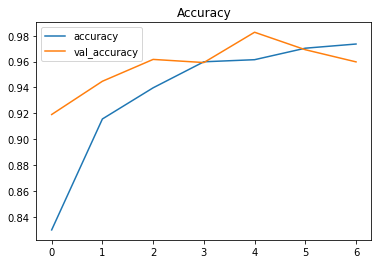

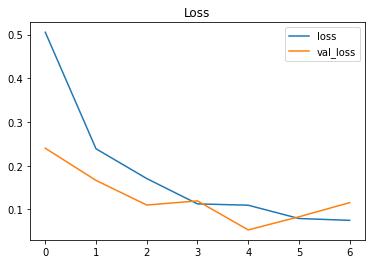

In [45]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [46]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.32170
Test Accuracy: 91.17%


In [47]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [48]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.94      0.95       530
                        Tomato___Early_blight       0.77      0.86      0.81       244
                         Tomato___Late_blight       0.92      0.95      0.93       508
                           Tomato___Leaf_Mold       0.60      0.98      0.75       238
                  Tomato___Septoria_leaf_spot       0.98      0.74      0.84       427
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.91      0.91       434
                         Tomato___Target_Spot       0.86      0.82      0.84       332
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.95      0.97      1348
                 Tomato___Tomato_mosaic_virus       0.99      0.76      0.86        91
                             Tomato___healthy       0.92      0.98      0.95       388

                                     accu

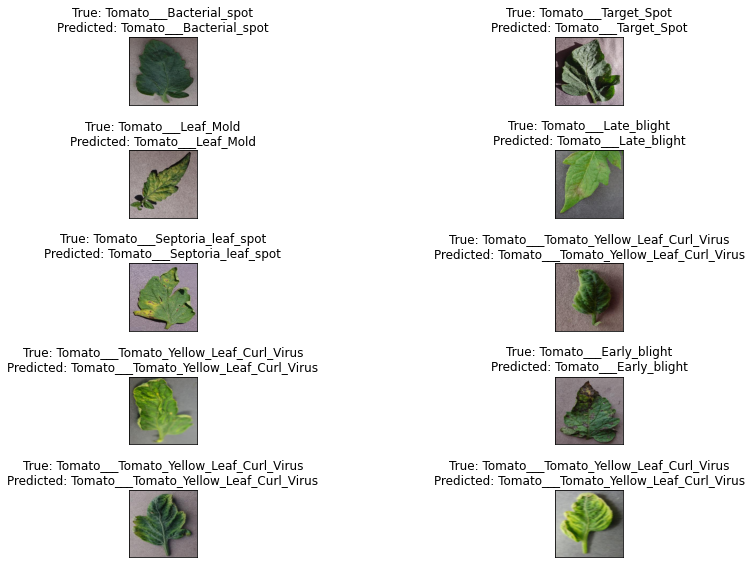

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [50]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://eb5023e8-4114-40f3-b7b8-9ab69a5bf1e7/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [51]:
# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)


In [53]:
# check prediction

pred=lr.predict(test_gen) 
predicted_class_indices=np.argmax(pred,axis=1)

In [55]:
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

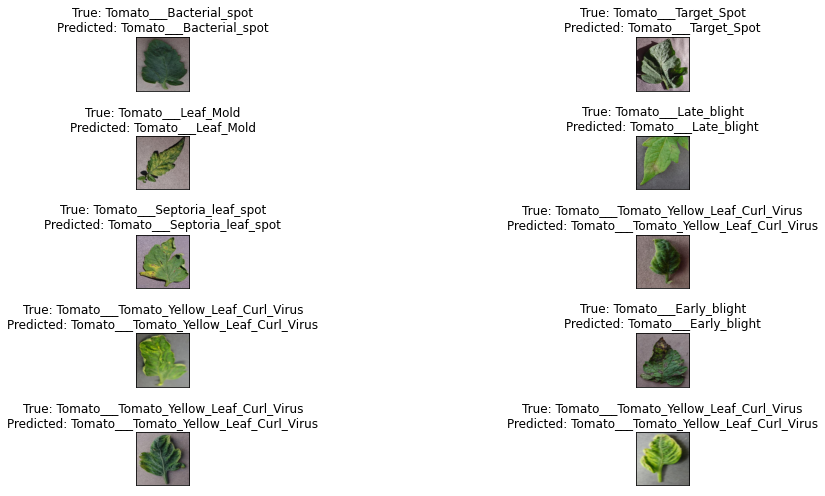

In [58]:
import matplotlib.pyplot as plt
f,a = plt.subplots(nrows=5, ncols=2,figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    # ax.set_title(predictions[i])
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {predictions[i]}")
    
plt.tight_layout()
plt.show()